In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from speclet.bayesian_models.lineage_hierarchical_nb import LineageHierNegBinomModel
from speclet.data_processing.vectors import zscale
from speclet.io import lineade_modeling_data_path
from speclet.managers.data_managers import CrisprScreenDataManager, broad_only

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
model = LineageHierNegBinomModel(lineage="kidney")

In [6]:
data_manager = CrisprScreenDataManager(
    lineade_modeling_data_path(model.lineage), transformations=[broad_only]
)
ct_data = data_manager.get_data(read_kwargs={"low_memory": False})
ct_data.head()

,sgrna,replicate_id,lfc,p_dna_batch,genome_alignment,hugo_symbol,screen,multiple_hits_on_gene,sgrna_target_chr,sgrna_target_pos,...,any_deleterious,any_tcga_hotspot,any_cosmic_hotspot,is_mutated,copy_number,lineage,lineage_subtype,primary_or_metastasis,is_male,age
0,AAAGCCCAGGAGTATGGGAG,G-401-311Cas9_RepA_p6_batch2,0.360147,2,chr2_130522105_-,CFC1B,broad,True,2,130522105,...,NaN,NaN,NaN,False,0.997626,kidney,malignant_rhabdoid_tumor,primary,True,0.25
1,AAATCAGAGAAACCTGAACG,G-401-311Cas9_RepA_p6_batch2,0.013803,2,chr11_89916950_-,TRIM49D1,broad,True,11,89916950,...,NaN,NaN,NaN,False,0.996058,kidney,malignant_rhabdoid_tumor,primary,True,0.25
2,AACGTCTTTGAAGAAAGCTG,G-401-311Cas9_RepA_p6_batch2,-2.001101,2,chr5_71055421_-,GTF2H2,broad,True,5,71055421,...,NaN,NaN,NaN,False,0.996752,kidney,malignant_rhabdoid_tumor,primary,True,0.25
3,AACGTCTTTGAAGGAAGCTG,G-401-311Cas9_RepA_p6_batch2,0.092259,2,chr5_69572480_+,GTF2H2C,broad,True,5,69572480,...,NaN,NaN,NaN,False,0.996752,kidney,malignant_rhabdoid_tumor,primary,True,0.25
4,AAGAGGTTCCAGACTACTTA,G-401-311Cas9_RepA_p6_batch2,-0.747593,2,chrX_155898173_+,VAMP7,broad,True,X,155898173,...,NaN,NaN,NaN,False,0.494212,kidney,malignant_rhabdoid_tumor,primary,True,0.25


In [7]:
valid_data = model.data_processing_pipeline(ct_data)

[INFO] 2022-08-03 09:37:05 [(lineage_hierarchical_nb.py:data_processing_pipeline:274] Processing data for modeling.
[INFO] 2022-08-03 09:37:05 [(lineage_hierarchical_nb.py:data_processing_pipeline:275] LFC limits: (-5.0, 5.0)
[WARNING] 2022-08-03 09:38:34 [(lineage_hierarchical_nb.py:data_processing_pipeline:326] number of data points dropped: 16


In [8]:
valid_data.shape

(1989720, 33)

In [9]:
valid_data.head()

,sgrna,replicate_id,lfc,p_dna_batch,genome_alignment,hugo_symbol,screen,multiple_hits_on_gene,sgrna_target_chr,sgrna_target_pos,...,is_male,age,z_rna_gene,m_rna_gene,z_cn_gene,z_cn_cell_line,counts_final_total,counts_initial_total,counts_final_rpm,counts_initial_adj
0,AAAGCCCAGGAGTATGGGAG,G-401-311Cas9_RepA_p6_batch2,0.360147,2,chr2_130522105_-,CFC1B,broad,True,2,130522105,...,True,0.25,0.000000,0.000000,-0.454262,0.193704,42834052,1.072163e+06,11.435623,313.488421
1,AAATCAGAGAAACCTGAACG,G-401-311Cas9_RepA_p6_batch2,0.013803,2,chr11_89916950_-,TRIM49D1,broad,True,11,89916950,...,True,0.25,5.000000,5.000000,0.086631,0.175290,42834052,1.072163e+06,3.754818,132.748181
2,AACGTCTTTGAAGAAAGCTG,G-401-311Cas9_RepA_p6_batch2,-2.001101,2,chr5_71055421_-,GTF2H2,broad,True,5,71055421,...,True,0.25,1.427810,1.427810,-0.290542,0.183439,42834052,1.072163e+06,2.260679,320.808471
3,AACGTCTTTGAAGGAAGCTG,G-401-311Cas9_RepA_p6_batch2,0.092259,2,chr5_69572480_+,GTF2H2C,broad,True,5,69572480,...,True,0.25,1.083952,1.083952,-0.290542,0.183439,42834052,1.072163e+06,9.567950,310.895925
4,AAGAGGTTCCAGACTACTTA,G-401-311Cas9_RepA_p6_batch2,-0.747593,2,chrX_155898173_+,VAMP7,broad,True,X,155898173,...,True,0.25,0.505909,0.505909,-0.888657,-5.000000,42834052,1.072163e+06,4.758692,279.534696


In [10]:
valid_data.columns

Index(['sgrna', 'replicate_id', 'lfc', 'p_dna_batch', 'genome_alignment',
       'hugo_symbol', 'screen', 'multiple_hits_on_gene', 'sgrna_target_chr',
       'sgrna_target_pos', 'depmap_id', 'counts_final', 'counts_initial',
       'rna_expr', 'num_mutations', 'any_deleterious', 'any_tcga_hotspot',
       'any_cosmic_hotspot', 'is_mutated', 'copy_number', 'lineage',
       'lineage_subtype', 'primary_or_metastasis', 'is_male', 'age',
       'z_rna_gene', 'm_rna_gene', 'z_cn_gene', 'z_cn_cell_line',
       'counts_final_total', 'counts_initial_total', 'counts_final_rpm',
       'counts_initial_adj'],
      dtype='object')

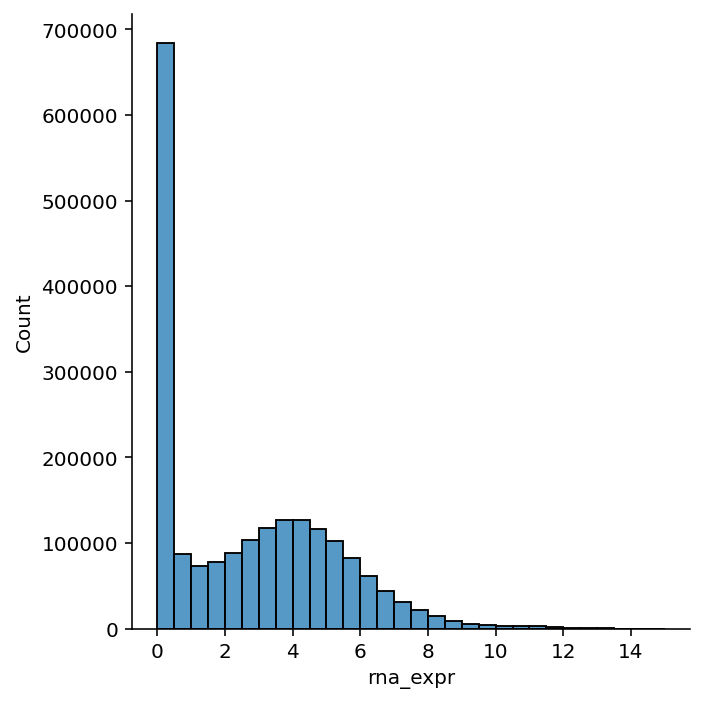

In [11]:
sns.displot(data=valid_data, x="rna_expr", binwidth=0.5);

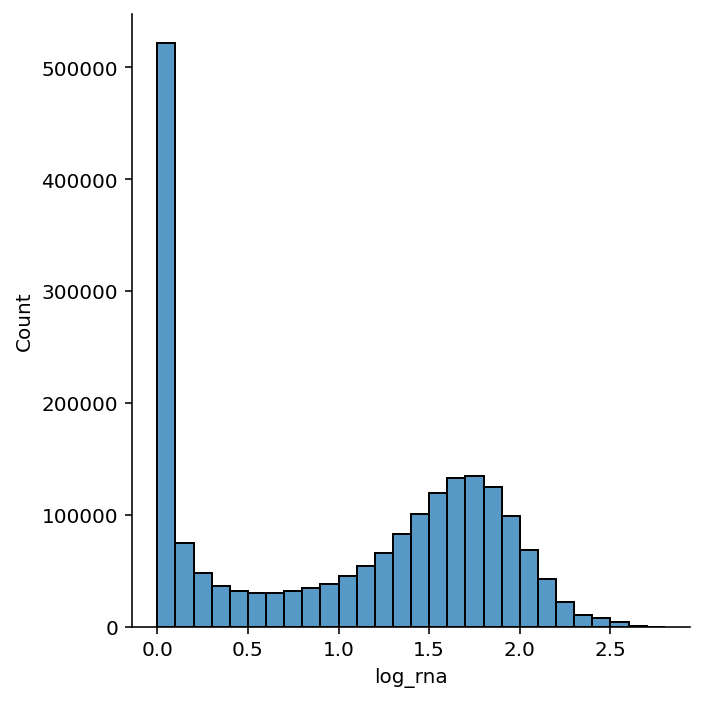

In [12]:
sns.displot(
    data=valid_data.assign(log_rna=lambda d: np.log(d.rna_expr + 1)),
    x="log_rna",
    binwidth=0.1,
);

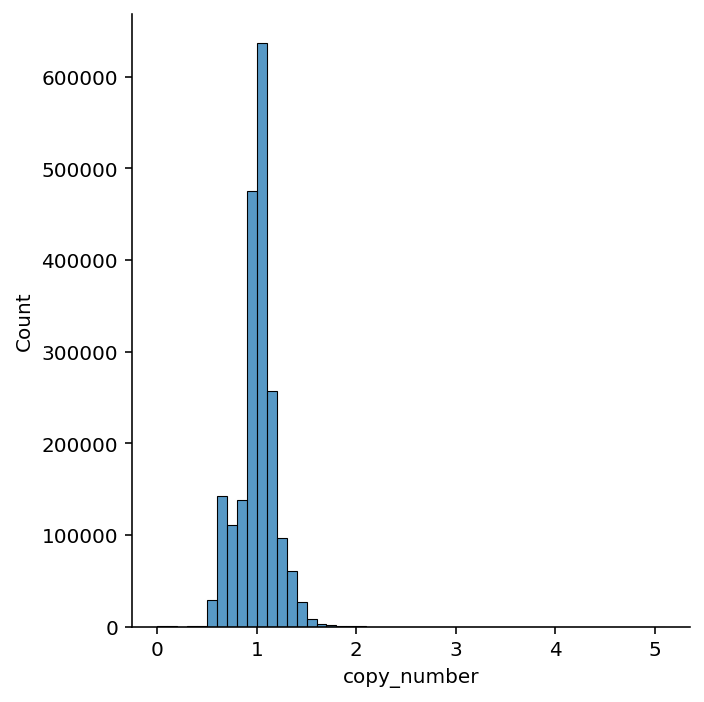

In [13]:
sns.displot(data=valid_data, x="copy_number", binwidth=0.1);

In [14]:
valid_data[["copy_number"]].describe().round(3)

,copy_number
count,1989720.000
mean,1.000
std,0.183
min,0.000
25%,0.929
50%,1.009
75%,1.086
max,5.030


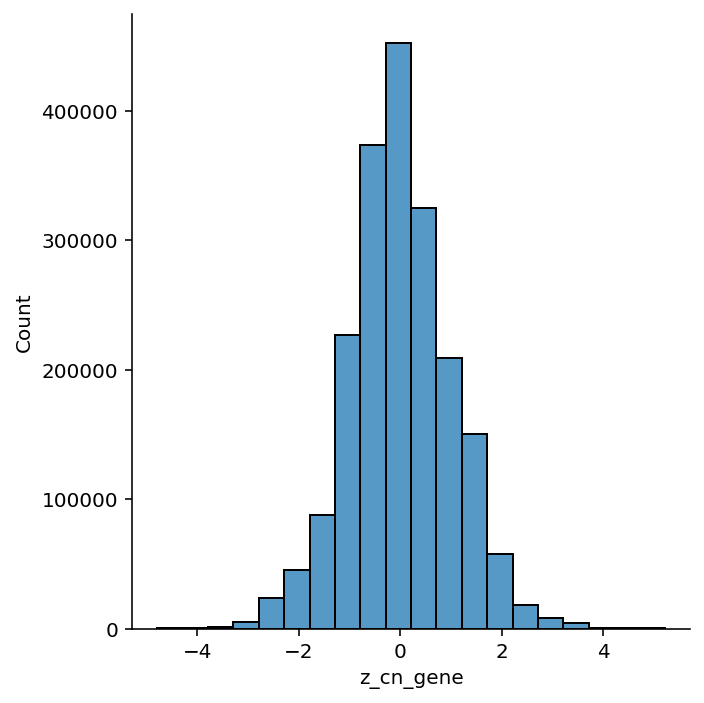

In [15]:
sns.displot(data=valid_data, x="z_cn_gene", binwidth=0.5);

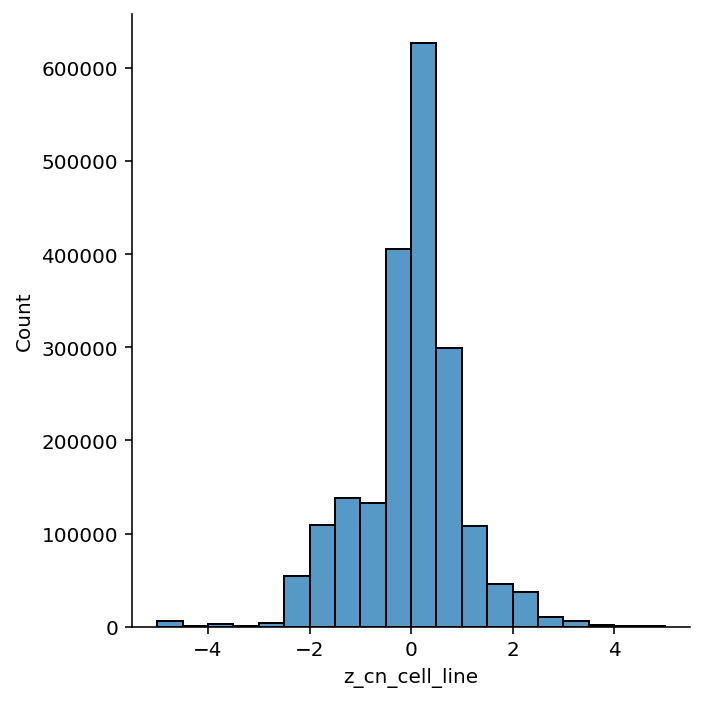

In [16]:
sns.displot(data=valid_data, x="z_cn_cell_line", binwidth=0.5);

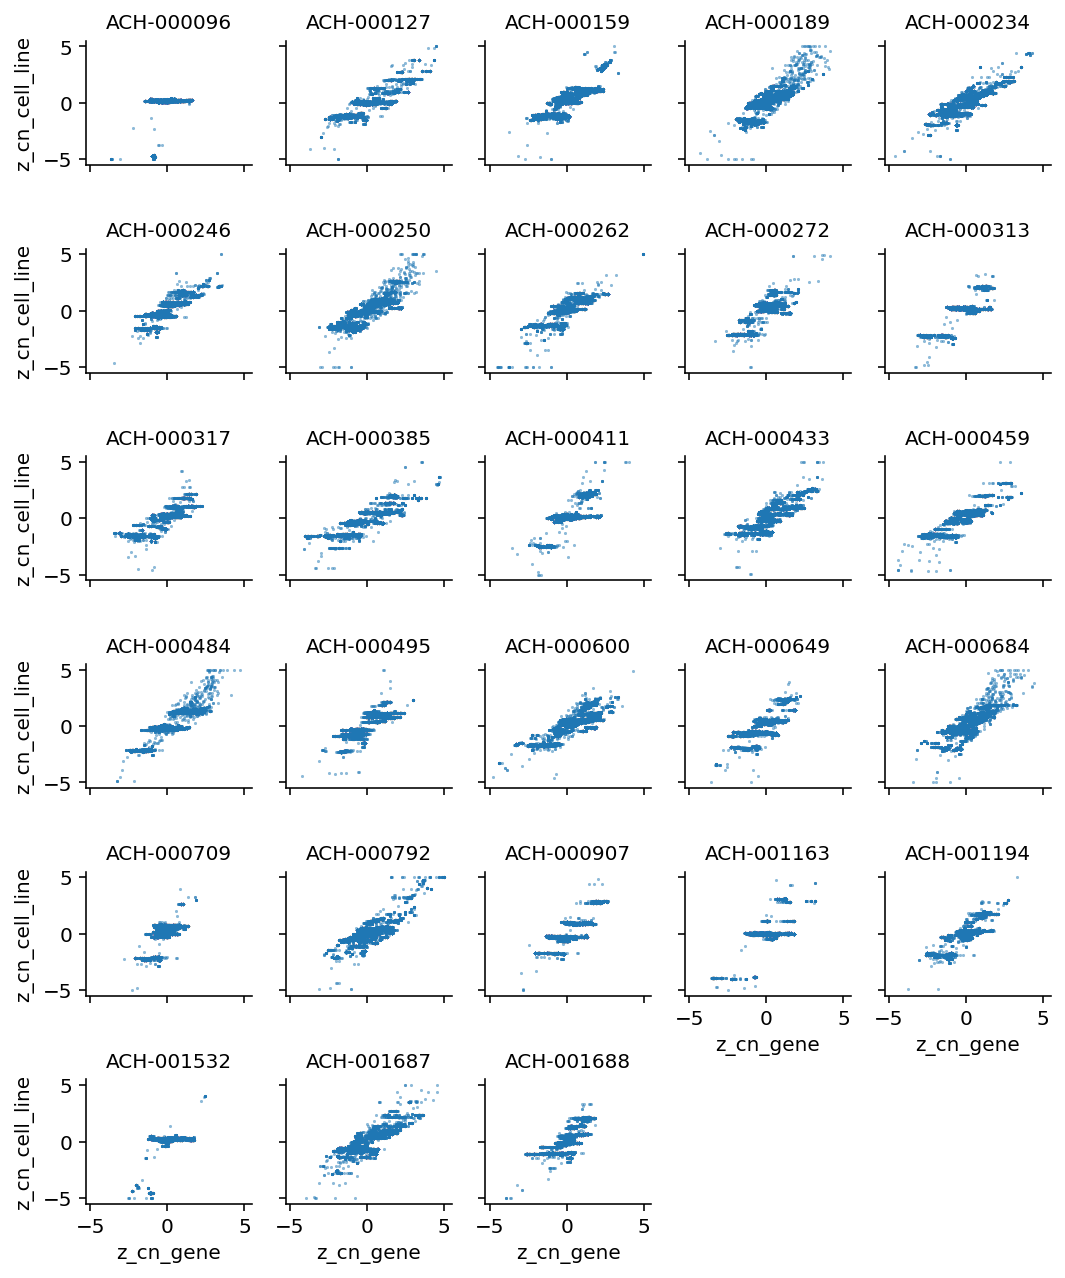

In [17]:
copy_number_data = valid_data[
    ["hugo_symbol", "depmap_id", "z_cn_gene", "z_cn_cell_line", "copy_number"]
].drop_duplicates()

fg = sns.relplot(
    data=copy_number_data,
    x="z_cn_gene",
    y="z_cn_cell_line",
    col="depmap_id",
    col_wrap=5,
    kind="scatter",
    height=1.5,
    aspect=1,
    s=2,
    alpha=0.5,
    edgecolor=None,
)
fg.set_titles("{col_name}")
plt.show()

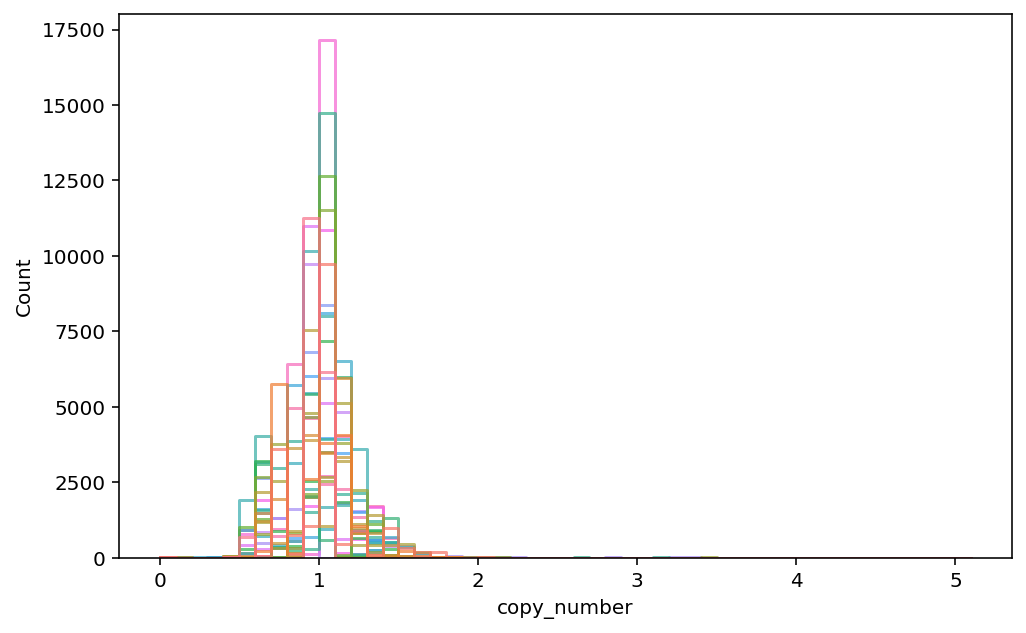

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=copy_number_data,
    x="copy_number",
    hue="depmap_id",
    binwidth=0.1,
    element="step",
    fill=False,
    ax=ax,
    alpha=0.7,
)
ax.get_legend().remove()
plt.show()

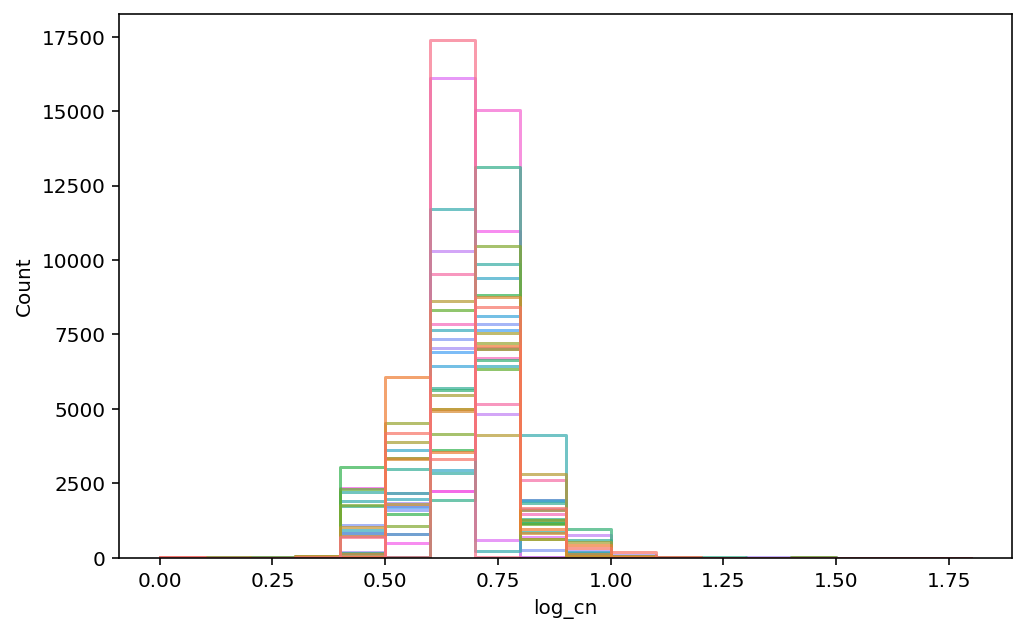

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=copy_number_data.assign(log_cn=lambda d: np.log(d["copy_number"] + 1)),
    x="log_cn",
    hue="depmap_id",
    binwidth=0.1,
    element="step",
    fill=False,
    ax=ax,
    alpha=0.7,
)
ax.get_legend().remove()
plt.show()

---

In [20]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-08-03

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 3.10.0-1160.45.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 28
Architecture: 64bit

Hostname: compute-e-16-233.o2.rc.hms.harvard.edu

Git branch: simplify

matplotlib: 3.5.2
numpy     : 1.23.1
pandas    : 1.4.3
seaborn   : 0.11.2

